In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. 데이터 불러오기
2. 데이터 확인 - 열(column)의 이름, 데이터 타입, 결측치 여부
3. feature간 상관 관계 분석

In [2]:
# 데이터 불러오기
train_df = pd.read_csv('../datasets/data_con/train.csv')
test_df = pd.read_csv('../datasets/data_con/test.csv')
subm_df = pd.read_csv('../datasets/data_con/sample_submission.csv')

display(train_df.head(3))
display(test_df.head(3))
display(subm_df.head())

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타 1,39,1000,23.0
1,TRAIN_00001,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,...,0.018029,1,1,0,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,...,0.010500,1,1,0,단순 노동자,2.0,사업 0,32,3,9.0


,ID,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TEST_00000,남성,0,0,2,37170000.0,근로자,대학교 중퇴,기혼,주택 / 아파트,0.006296,1,1,0,핵심 노동자,4.0,기타 0,27,2,8.0
1,TEST_00001,남성,0,0,0,47790000.0,근로자,대학교 졸업 이상,기혼,주택 / 아파트,0.004960,1,1,0,관리직,2.0,정부,40,8,11.0
2,TEST_00002,남성,1,1,1,37170000.0,공무원,고등학교 졸업,기혼,주택 / 아파트,0.026392,1,1,0,관리직,3.0,국가 안보,43,15,14.0


,ID,TARGET
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [3]:
train_df[train_df['TARGET']==1]['연간 수입'].mean()

38264739.437772244

In [4]:
train_df[train_df['TARGET']==0]['연간 수입'].mean()

40025645.27028635

In [5]:
train_df[train_df['TARGET']==1]['연간 수입'].std()

20223614.184796963

In [6]:
train_df[train_df['TARGET']==0]['연간 수입'].std()

25202878.8918344

In [7]:
# 컬럼 확인
train_df.columns

Index(['ID', 'TARGET', '성별', '차량 소유 여부', '부동산 소유 여부', '자녀 수', '연간 수입', '수입 유형',
       '최종 학력', '결혼 여부', '주거 형태', '거주지 인구 비율', '휴대전화 소유 여부', '업무용 휴대전화 소유 여부',
       '이메일 소유 여부', '직업', '가족 구성원 수', '산업군', '나이', '근속연수', '가입연수'],
      dtype='object')

In [8]:
subm_df.columns

Index(['ID', 'TARGET'], dtype='object')

In [9]:
# 결측치 여부 확인
train_df.isna().sum() # 결측치 존재x

ID                0
TARGET            0
성별                0
차량 소유 여부          0
부동산 소유 여부         0
자녀 수              0
연간 수입             0
수입 유형             0
최종 학력             0
결혼 여부             0
주거 형태             0
거주지 인구 비율         0
휴대전화 소유 여부        0
업무용 휴대전화 소유 여부    0
이메일 소유 여부         0
직업                0
가족 구성원 수          0
산업군               0
나이                0
근속연수              0
가입연수              0
dtype: int64

In [10]:
test_df.isna().sum() # 결측치 존재x

ID                0
성별                0
차량 소유 여부          0
부동산 소유 여부         0
자녀 수              0
연간 수입             0
수입 유형             0
최종 학력             0
결혼 여부             0
주거 형태             0
거주지 인구 비율         0
휴대전화 소유 여부        0
업무용 휴대전화 소유 여부    0
이메일 소유 여부         0
직업                0
가족 구성원 수          0
산업군               0
나이                0
근속연수              0
가입연수              0
dtype: int64

In [11]:
subm_df.isna().sum()

ID        0
TARGET    0
dtype: int64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  object 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  object 
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  object 
 8   최종 학력           60000 non-null  object 
 9   결혼 여부           60000 non-null  object 
 10  주거 형태           60000 non-null  object 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  object 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              40000 non-null  object 
 1   성별              40000 non-null  object 
 2   차량 소유 여부        40000 non-null  int64  
 3   부동산 소유 여부       40000 non-null  int64  
 4   자녀 수            40000 non-null  int64  
 5   연간 수입           40000 non-null  float64
 6   수입 유형           40000 non-null  object 
 7   최종 학력           40000 non-null  object 
 8   결혼 여부           40000 non-null  object 
 9   주거 형태           40000 non-null  object 
 10  거주지 인구 비율       40000 non-null  float64
 11  휴대전화 소유 여부      40000 non-null  int64  
 12  업무용 휴대전화 소유 여부  40000 non-null  int64  
 13  이메일 소유 여부       40000 non-null  int64  
 14  직업              40000 non-null  object 
 15  가족 구성원 수        40000 non-null  float64
 16  산업군             40000 non-null  object 
 17  나이              40000 non-null 

In [14]:
subm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      40000 non-null  object
 1   TARGET  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [15]:
train_df.describe()

,TARGET,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,가족 구성원 수,나이,근속연수,가입연수
count,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.107133,0.337517,0.708633,0.412050,3.983699e+07,0.020880,0.999983,0.812033,0.056350,2.155767,44.021183,192.906833,13.271833
std,0.309285,0.472867,0.454396,0.723998,2.472331e+07,0.013850,0.004082,0.390689,0.230598,0.908213,11.852450,388.292796,9.727011
min,0.000000,0.000000,0.000000,0.000000,6.265800e+06,0.000533,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.655000e+07,0.010006,1.000000,1.000000,0.000000,2.000000,34.000000,2.000000,5.000000
50%,0.000000,0.000000,1.000000,0.000000,3.504600e+07,0.018850,1.000000,1.000000,0.000000,2.000000,43.000000,6.000000,12.000000
75%,0.000000,1.000000,1.000000,1.000000,4.779000e+07,0.028663,1.000000,1.000000,0.000000,3.000000,54.000000,16.000000,20.000000
max,1.000000,1.000000,1.000000,19.000000,2.124000e+09,0.072508,1.000000,1.000000,1.000000,20.000000,69.000000,1000.000000,58.000000


In [16]:
test_df.describe()

,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,가족 구성원 수,나이,근속연수,가입연수
count,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.339175,0.709175,0.414875,3.975255e+07,0.020815,1.0,0.813400,0.055500,2.162175,43.957575,191.501825,13.278750
std,0.473435,0.454149,0.717472,2.301272e+07,0.013735,0.0,0.389595,0.228956,0.901413,11.798254,387.289855,9.759195
min,0.000000,0.000000,0.000000,6.265800e+06,0.000533,1.0,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.655000e+07,0.010006,1.0,1.000000,0.000000,2.000000,34.000000,2.000000,5.000000
50%,0.000000,1.000000,0.000000,3.504600e+07,0.018850,1.0,1.000000,0.000000,2.000000,43.000000,6.000000,12.000000
75%,1.000000,1.000000,1.000000,4.779000e+07,0.028663,1.0,1.000000,0.000000,3.000000,54.000000,16.000000,20.000000
max,1.000000,1.000000,6.000000,7.965000e+08,0.072508,1.0,1.000000,1.000000,8.000000,69.000000,1000.000000,59.000000


### TARGET
- TARGET 값이 1이면 연체
- TARGET 값이 0이면 연체하지 않음

In [17]:
# TARGET
train_df['TARGET'].value_counts()

TARGET
0    53572
1     6428
Name: count, dtype: int64

In [18]:
# TARGET 데이터 비율 확인
train_df['TARGET'].value_counts(normalize=True)

TARGET
0    0.892867
1    0.107133
Name: proportion, dtype: float64

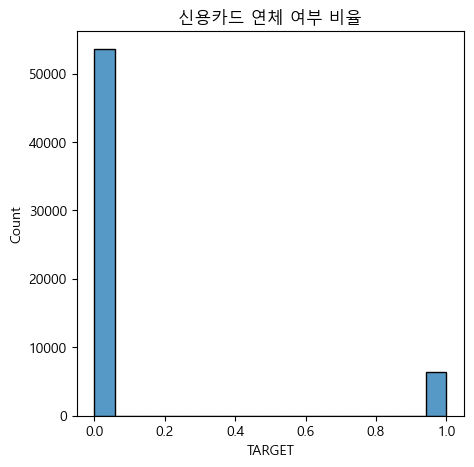

In [19]:
# 한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplots(figsize = (5,5)) # 그림 크기 설정

sns.histplot(train_df, x='TARGET')
plt.title('신용카드 연체 여부 비율')
plt.show()

In [20]:
train_df['산업군']

0        기타 1
1        사업 1
2        사업 0
3        산업 4
4        사업 2
         ... 
59995    기타 1
59996     자영업
59997      은행
59998     우체부
59999      경찰
Name: 산업군, Length: 60000, dtype: object